In [1]:
%%cython

cdef extern from 'gsl/gsl_rng.h':
   ctypedef struct gsl_rng_type:
      pass
   ctypedef struct gsl_rng:
       pass
   gsl_rng_type *gsl_rng_mt19937
   gsl_rng *gsl_rng_alloc(gsl_rng_type * T)
  
cdef gsl_rng *r = gsl_rng_alloc(gsl_rng_mt19937)

cdef extern from 'gsl/gsl_randist.h':
     long int uniform 'gsl_rng_uniform_int'(gsl_rng * r, unsigned long int n)

def bit_aleatorio():
    cdef int n
    n = uniform(r,2)
    return n

In [2]:
print [bit_aleatorio() for muda in range(10)]

[1, 0, 0, 1, 0, 0, 1, 1, 1, 1]


In [3]:
%time L=[bit_aleatorio() for _ in srange(1024*1024)]

CPU times: user 312 ms, sys: 36 ms, total: 348 ms
Wall time: 329 ms


In [4]:
from string import *

def archivo(L):
    C = ''
    while L != []:
        C += (chr(int(join(map(str,L[:8]),sep=''),base=2)))
        L = L[8:]
    outfile = open("prueba-bits","wb") #Abrimos el archivo para escribir en el
    outfile.write(C)                        #Escribimos la cadena C al archivo
    outfile.close()                         #Cerramos el archivo

In [5]:
%time archivo(L)

CPU times: user 4min 24s, sys: 204 ms, total: 4min 24s
Wall time: 4min 24s


In [6]:
from string import *

def archivo2(N,filename):
    outfile = open(filename,"wb")
    for muda in xrange(N):
        L = [bit_aleatorio() for _ in range(8)]
        C = (chr(int(join(map(str,L),sep=''),base=2)))
        outfile.write(C)                        
    outfile.close()       

In [7]:
%time archivo2(1024*1024//8,"prueba-bits-3")

CPU times: user 552 ms, sys: 0 ns, total: 552 ms
Wall time: 552 ms


In [8]:
%time archivo2(2048*2048//8,"prueba-bits-4")

CPU times: user 2.19 s, sys: 4 ms, total: 2.2 s
Wall time: 2.2 s


## Con distintas probabilidades

In [9]:
%%cython

cdef extern from 'gsl/gsl_rng.h':
   ctypedef struct gsl_rng_type:
      pass
   ctypedef struct gsl_rng:
       pass
   gsl_rng_type *gsl_rng_mt19937
   gsl_rng *gsl_rng_alloc(gsl_rng_type * T)
  
cdef gsl_rng *r = gsl_rng_alloc(gsl_rng_mt19937)

cdef extern from 'gsl/gsl_randist.h':
     double uniform 'gsl_rng_uniform'(gsl_rng * r)

def dec_aleatorio():
    cdef double n
    n = uniform(r)
    return n

In [10]:
print [dec_aleatorio() for muda in range(10)]

[0.999741748906672, 0.16290987539105117, 0.28261780529282987, 0.9472010820172727, 0.23165654274635017, 0.48497361433692276, 0.9574769565369934, 0.7443053431343287, 0.5400436583440751, 0.7399529814720154]


In [11]:
def dado_trucado(p):
    x = dec_aleatorio()
    #print x
    if x < p:
        return 0
    else:
        return 1

In [12]:
from string import *
#from os import *


def archivo2p(N,p,filename):
    outfile = open(filename,"wb")
    for muda in xrange(N):
        L = [dado_trucado(p) for _ in range(8)]
        C = (chr(int(join(map(str,L),sep=''),base=2)))
        outfile.write(C)  
    outfile.close()
    
    

In [13]:

def generar_archivos(n):
    L = []
    for j in range(0,n+1):
        p = (j/n).n()
        filename = "/home/rhg/Desktop/COMPRESION/prueba-bits"+'-'+str(p)
        #print p
        #os.chdir("/home/rhg/Desktop/COMPRESION/")
        archivo2p(2048*2048//8,p,filename)
        os.system("tar cvzf %s %s" %(filename+'.tar.gz',filename))
        tam = os.lstat(filename+'.tar.gz').st_size
        L.append((p,tam))
    return L

In [14]:
%time L = generar_archivos(20);print L

[(0.000000000000000, 671), (0.0500000000000000, 196920), (0.100000000000000, 294186), (0.150000000000000, 360424), (0.200000000000000, 406104), (0.250000000000000, 438138), (0.300000000000000, 468332), (0.350000000000000, 494033), (0.400000000000000, 512381), (0.450000000000000, 523281), (0.500000000000000, 524636), (0.550000000000000, 523296), (0.600000000000000, 512405), (0.650000000000000, 494027), (0.700000000000000, 468100), (0.750000000000000, 438252), (0.800000000000000, 406057), (0.850000000000000, 360491), (0.900000000000000, 294262), (0.950000000000000, 197135), (1.00000000000000, 666)]
CPU times: user 2min 21s, sys: 160 ms, total: 2min 21s
Wall time: 2min 22s


In [15]:
2048*2048//8

524288

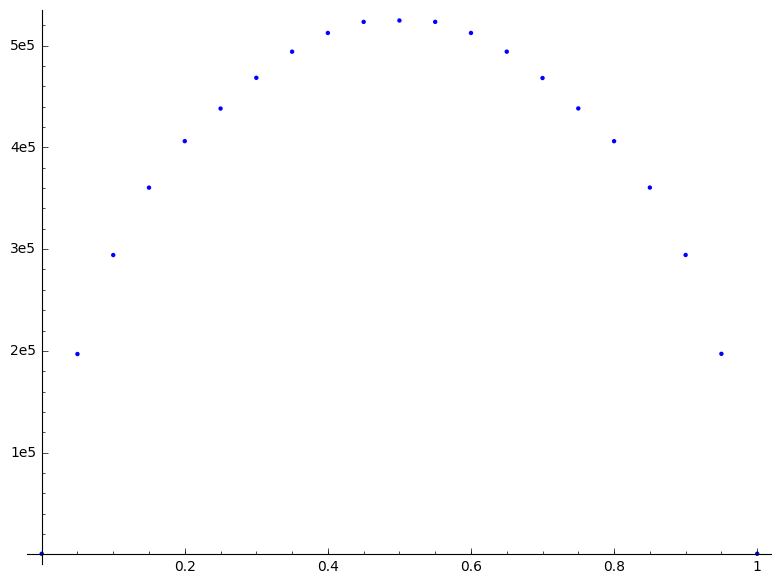

In [16]:
points(L)

In [17]:
var('a b c x'); model(x) = a*x^2+b*x+c
dicc = find_fit(L,model,solution_dict=True);print dicc

{b: 1871727.966979465, c: 80469.54222300767, a: -1871666.4863607015}


In [18]:
def solucion(x,dicc):
    return dicc[a]*x**2+dicc[b]*x+dicc[c]

In [19]:
[(item[0],item[1]-solucion(item[0],dicc)) for item in L]

[(0.000000000000000, -79798.5422230077),
 (0.0500000000000000, 27543.2256439208),
 (0.100000000000000, 45260.3259426529),
 (0.150000000000000, 41307.7586731884),
 (0.200000000000000, 26155.5238355274),
 (0.250000000000000, 6715.62142966996),
 (0.300000000000000, -5205.94854438398),
 (0.350000000000000, -12262.1860866345),
 (0.400000000000000, -17313.0911970814),
 (0.450000000000000, -20453.6638757249),
 (0.500000000000000, -23780.9041225648),
 (0.550000000000000, -20444.8119376012),
 (0.600000000000000, -17301.3873208341),
 (0.650000000000000, -12286.6302722635),
 (0.700000000000000, -5462.54079188954),
 (0.750000000000000, 6798.88112028805),
 (0.800000000000000, 26071.6354642697),
 (0.850000000000000, 41331.7222400538),
 (0.900000000000000, 45287.1414476421),
 (0.950000000000000, 27702.8930870339),
 (1.00000000000000, -79865.0228417711)]

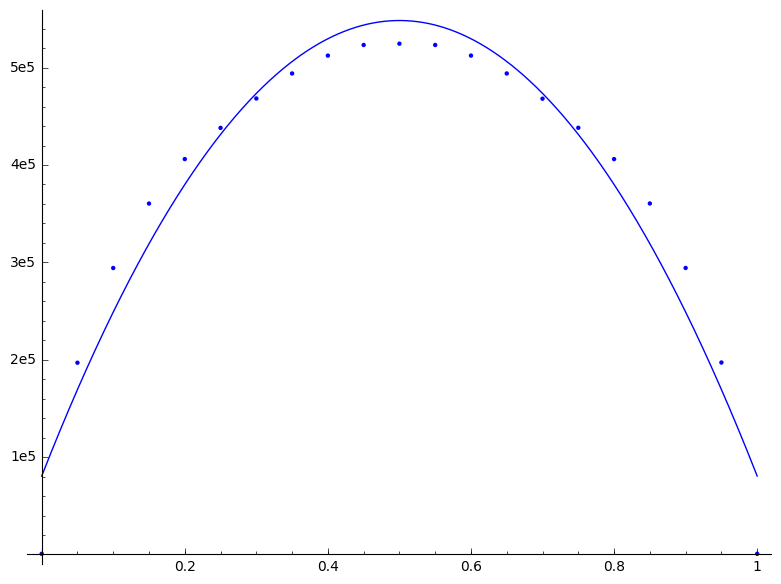

In [20]:
points(L)+plot(dicc[a]*x**2+dicc[b]*x+dicc[c],x,0,1)